# Height vs Weight(Predictor vs Response variable)

1) Weight of the person increases with the increase of height.

2) So, height is an independent variable and weight is dependent variable.

3) Predict for a given height, what shall be the weight of the person??

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [4]:
#import visualization package: seaborn
import seaborn as sns
%matplotlib inline

## Solving problem using basic statistical way for first five rows(starting from 0)

If given that, the height of a person is 188 cm.

Then what would be the weight of that person??

In [10]:
#path of data
path = "E:\Regression-Master\Height_Weight_1.csv"
df = pd.read_csv(path)
df.head()

,Heights(cm),Weight(kg)
0,122,28
1,142,40
2,163,60
3,178,75
4,208,105


(0.0, 109.30000000000013)

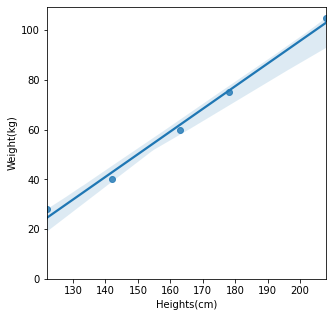

In [15]:
width = 5
height = 5
plt.figure(figsize = (width, height))
sns.regplot(x = 'Heights(cm)', y = 'Weights(kg)', data = df)
plt.ylim(0,)

Best fit (Best Regression Line)
\begin{equation}
\hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_i
\end{equation}

Intercept(Y intercept or $\hat{\beta}_0$ or bias):
    
\begin{equation}
\hat{\beta}_0 = \bar{Y} – \hat{\beta}_1 \bar{X}
\end{equation}

Slope(m or $\hat{\beta}_1$ or first coefficient):

\begin{equation}
\hat{\beta}_1 = \frac{\sum(X_i – \bar{X}) (Y_i – \bar{Y})} {\sum(X_i – \bar{X})^2} 
\end{equation}


$ \bar{X} $ : 162.6

$ \bar{Y} $ : 61.6

Substitute all values:

$ \hat{\beta}_1 $ : 0.9117

We get:

$ \hat{\beta}_0 $ : -86.642

# Prediction Time!!!

### y = 0.9117x - 86.642

### Question:

If given that, the height of a person is 188 cm.

Then what would be the weight of that person??


### Answer
y = 0.9117(188) - 86.642 = 84.75

But the actual value in our 'Height_Weight.csv' has the value of 85

Loss = Predicted - Original

Loss = $\lvert 84.75 - 85 \rvert$ = 0.25

Our model is doing good as it is close to zero.

## Solving problem using Python + DA technique

##### We will divide the entire dataset into (70%)Training and (30%)Testing sets.

#### Using training models on training set and

#### Using testing labels with testing set

In [5]:
#Load the heights and weights dataset, TOTAL : 35 ROWS
hw_data = pd.read_csv('E:\Regression-Master\Height_Weight.csv')

hw_data.head(10)

,Height,Weight
0,121.92,28.0
1,124.46,28.1
2,127.00,28.2
3,129.54,28.3
4,132.08,28.4
5,134.62,28.5
6,137.16,35.2
7,139.70,37.6
8,142.24,40.0
9,144.78,42.6


In [6]:
hw_data.tail(10)

,Height,Weight
25,185.42,82.5
26,187.96,84.8
27,190.50,87.5
28,193.04,89.8
29,195.58,92.5
30,198.12,94.8
31,200.66,97.5
32,203.20,99.8
33,205.00,102.5
34,208.00,104.8


In [7]:
hw_data.shape #total 35 rows

(35, 2)

In [9]:
#TOTAL rows are 35, the first row is header so,

# Split the data into training and testing sets
hw_X_train = hw_data.Height[0:30] #30 height column data
hw_X_test = hw_data.Height[30:34] #4 height column data and last fifth value is left for predicting model

# Split the target into training and testing sets

hw_Y_train = hw_data.Weight[0:30] #30 weight column data
hw_Y_test = hw_data.Weight[30:34] # 4 weight column data and last fifth value is left for predicting model

print(hw_X_test)
print(hw_Y_test)

30    198.12
31    200.66
32    203.20
33    205.00
Name: Height, dtype: float64
30     94.8
31     97.5
32     99.8
33    102.5
Name: Weight, dtype: float64


In [11]:
#Reshape
#scikit learn has its own way of dealing with horizontal data, so we have to reshape with (-1,1), column only 1 is decided but rows it will decide of his own

hw_X_train = np.array(hw_data.Height[0:30]).reshape(-1,1)
hw_X_test = np.array(hw_data.Height[30:34]).reshape(-1,1)


hw_Y_train = np.array(hw_data.Weight[0:30]).reshape(-1,1)
hw_Y_test  = np.array(hw_data.Weight[30:34]).reshape(-1,1)

hw_X_test, hw_Y_test

(array([[198.12],
        [200.66],
        [203.2 ],
        [205.  ]]),
 array([[ 94.8],
        [ 97.5],
        [ 99.8],
        [102.5]]))

In [13]:
#Create Linear Regression object

regr = linear_model.LinearRegression()

In [14]:
#Train the model using the training sets
regr.fit(hw_X_train, hw_Y_train)

LinearRegression()

In [15]:
#Make predictions using the testing sets
hw_Y_pred = regr.predict(hw_X_test)

In [16]:
#Lets check both predicted and true values
print("Predicted Values: ", hw_Y_pred)
print("True Labels: ", hw_Y_test)

Predicted Values:  [[ 94.01655172]
 [ 96.42858732]
 [ 98.84062291]
 [100.54993948]]
True Labels:  [[ 94.8]
 [ 97.5]
 [ 99.8]
 [102.5]]


In [17]:
#check the last value 
hw_data.tail(1)

,Height,Weight
34,208.0,104.8


In [20]:
#Lets Predict
#np.array[element name] will able to access the element

print("The predicted value:" , regr.predict(np.array([208]).reshape(-1,1)))
print("The actual value: ", hw_data.Weight[34])


The predicted value: [[103.39880042]]
The actual value:  104.8


### Find out the best fit with coefficients and intercept

In [21]:
#These are neither an attributes or functions, they are parameters
#The coefficients , (m slope)
print('Coefficients: ', regr.coef_)

#The intercepts, (c)
print('Intercepts', regr.intercept_)

Coefficients:  [[0.94962031]]
Intercepts [-94.12222469]


In [23]:
hw_data.tail(1)

,Height,Weight
34,208.0,104.8


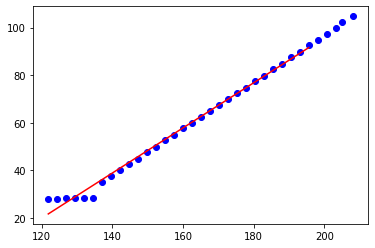

In [30]:
#Plotting Regression lines against True Labels
plt.scatter(hw_data.Height, hw_data.Weight, color = 'blue')
plt.plot(hw_X_train, regr.coef_[0][0]*hw_X_train + regr.intercept_[0], '-r')
plt.show()

In [31]:
#Evaluate Model

#The mean squared error

print(f"The Mean Squarred Error (Test Dataset):{mean_squared_error(hw_Y_test, hw_Y_pred)}")

The mean squarred error (Test Dataset):1.6212141915281824
